# exploring-dataset
+ we're gonna use seaborn to look through the data and glean some info
+ going to try to derive meaningful equations for energy and dance (maybe a few for each) 

In [1]:
# IMPORTS 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy import stats, integrate
import seaborn as sns

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline
%run utilities.py

In [2]:
%run utilities.py
util = Utilities({}, use_json=False)

# Get data points (m = 4k)
master_DF = util.get_master_dataframe()

## meta-data features
+ the artist_x ones already have good correlation

/home/rshn/anaconda3/envs/py2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


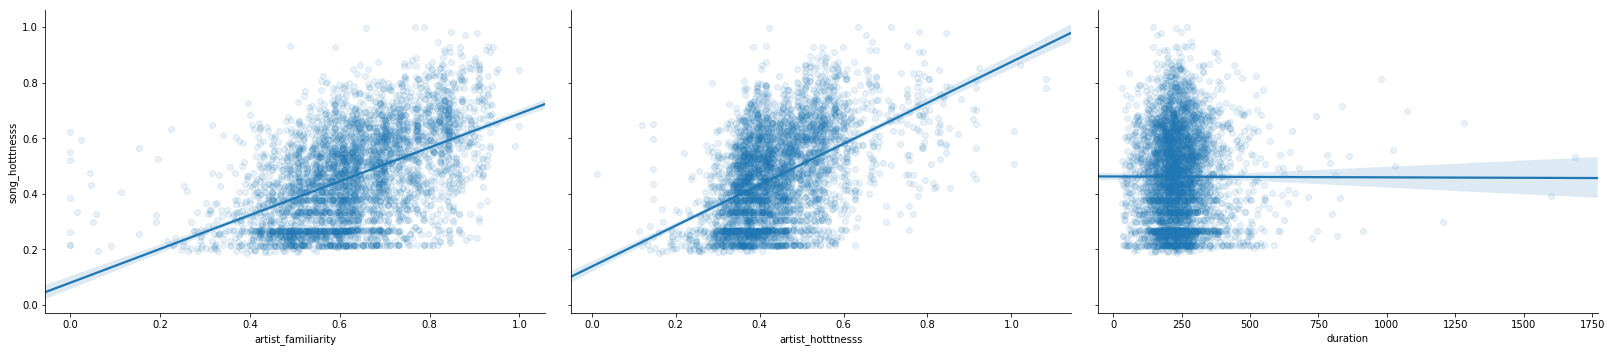

In [3]:
sns.pairplot(master_DF, x_vars=['artist_familiarity', 'artist_hotttnesss', 'duration'], 
             y_vars='song_hotttnesss', height=5, aspect=1.5, kind='reg',  plot_kws={'scatter_kws': {'alpha': 0.1}})

## acoustic features
+ very poor correlation in these

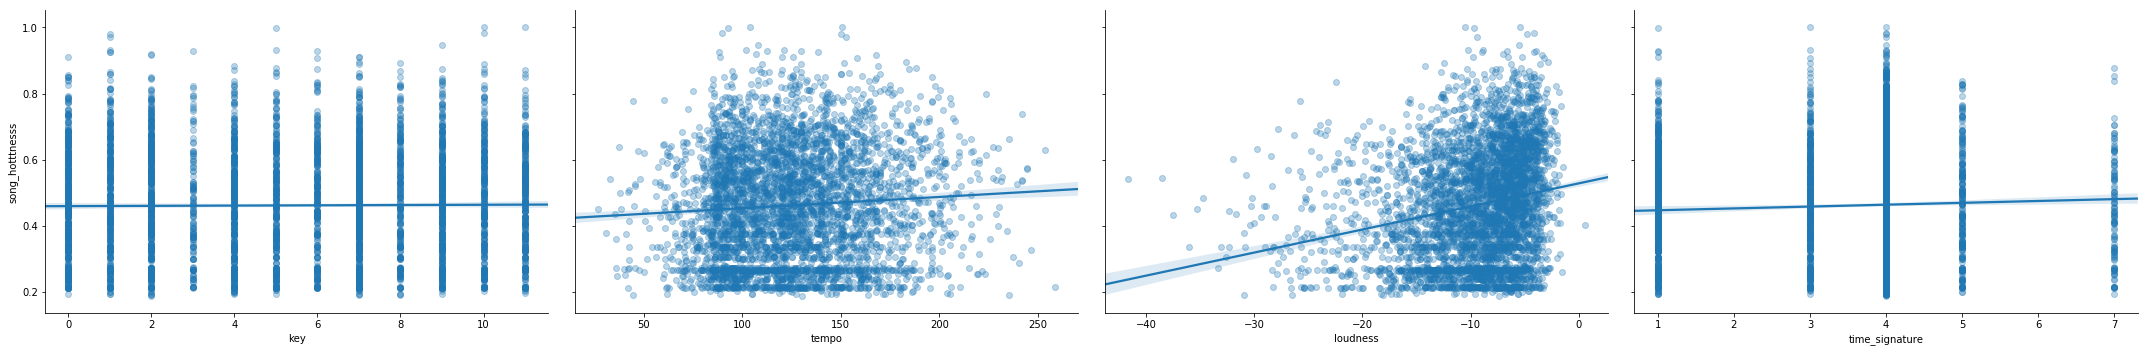

In [4]:
# The raw acoustic features 
sns.pairplot(master_DF, x_vars=['key', 'tempo', 'loudness', 'time_signature'], 
             y_vars='song_hotttnesss', height=5, aspect=1.5, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})

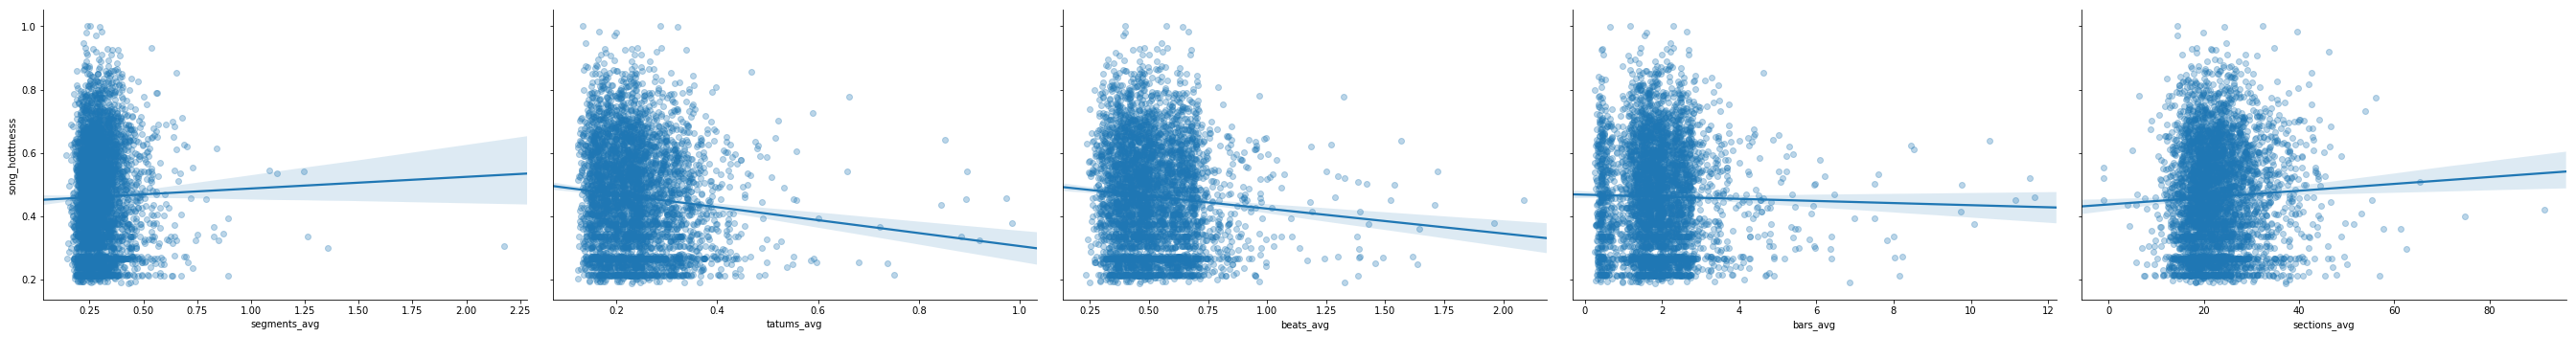

In [5]:
# all the interval averages
sns.pairplot(master_DF, x_vars=['segments_avg', 'tatums_avg', 'beats_avg', 'bars_avg', 'sections_avg'], 
             y_vars='song_hotttnesss', height=5, aspect=1.5, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})

# Feature engineering 

## Experimenting with new feature: ENERGY
`energy`:  The feature mix we use to compute energy includes loudness and segment durations.


<Figure size 432x288 with 0 Axes>

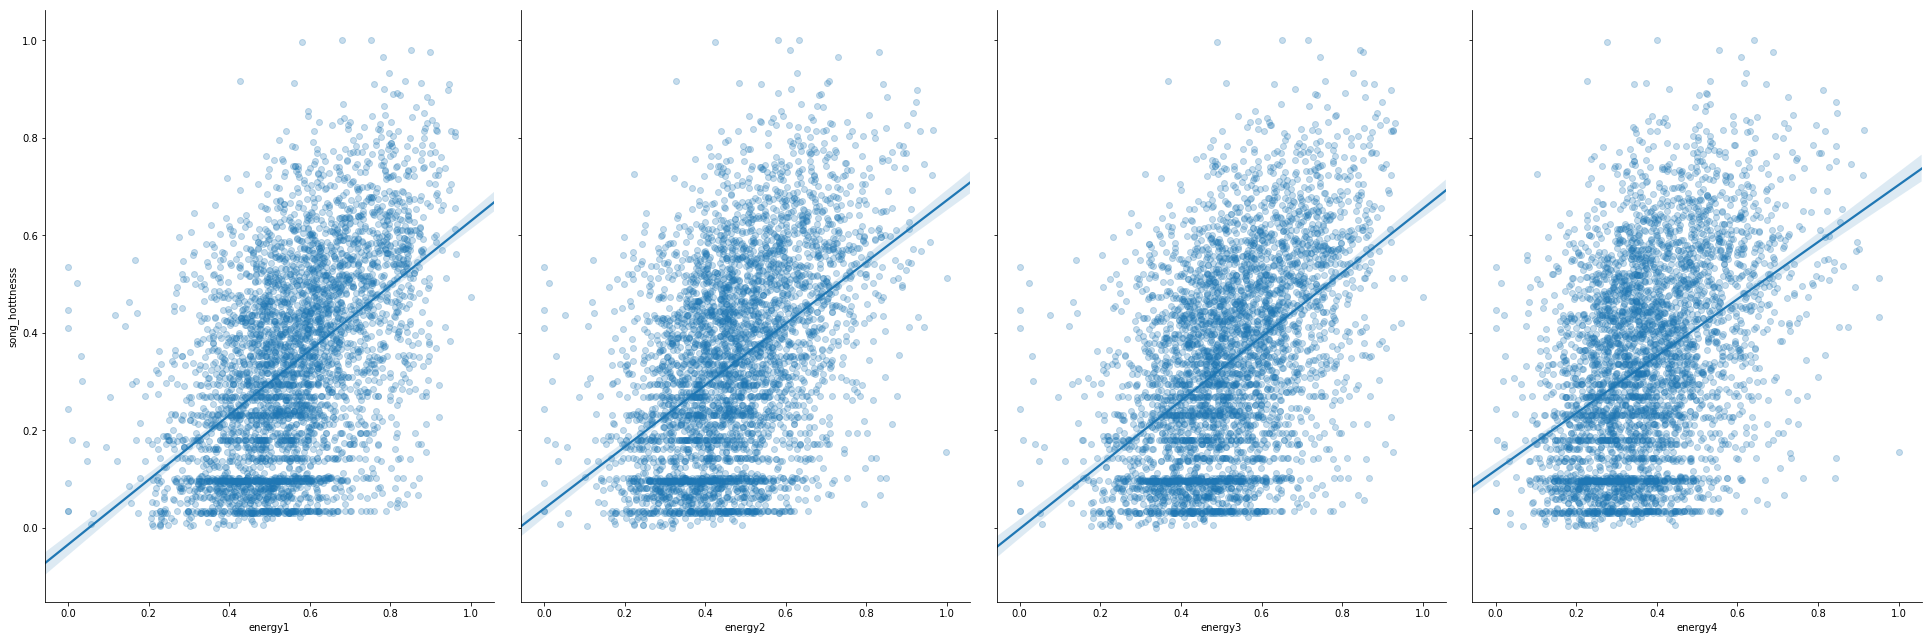

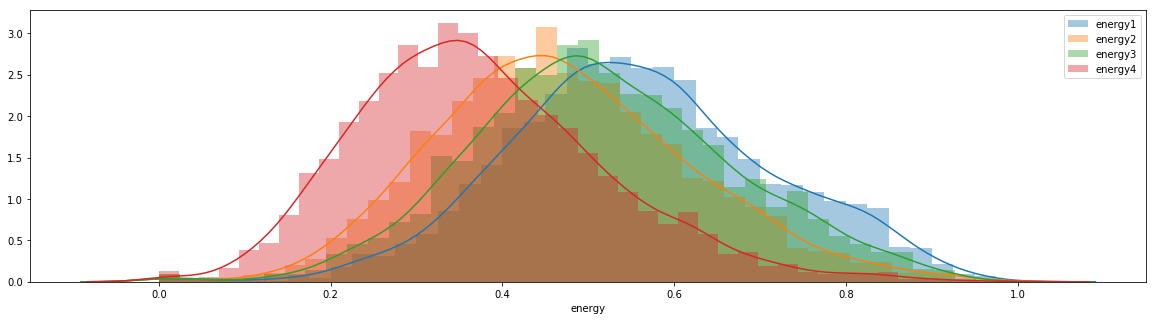

In [6]:
%run utilities.py
util = Utilities({}, use_json=False)

# loudness = training_DF['loudness']
# tempo = training_DF['tempo']
# time_sig = training_DF['time_signature']
# sections_avg = training_DF['sections_avg']
# beats_avg = training_DF['beats_avg']
# tatums_avg = training_DF['tatums_avg']
# training_DF['energy1'] = (50+loudness)**2*(12-time_sig)/1000
# training_DF['energy2'] = (50+loudness)**2*(12-time_sig)/(5000*beats_avg)
# training_DF['energy3'] = (50+loudness)**2*(12-time_sig)/(10000*tatums_avg)
# training_DF['energy4'] = (50+loudness)**2*(12-time_sig)/(50000*tatums_avg*beats_avg)

master_DF = util.generate_energy_measure(master_DF)

# normalize features  
master_DF = util.normalize_numeric_columns(master_DF)


sns.pairplot(master_DF, x_vars=['energy1', 'energy2', 'energy3', 'energy4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', height=9, aspect=.75, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.25}})

# Trying to figure out which energy is better to use... 5
plt.subplots(figsize=(20,5))

energyplt = sns.distplot(master_DF['energy1'], label='energy1', )
energyplt = sns.distplot(master_DF['energy2'], label='energy2')
energyplt = sns.distplot(master_DF['energy3'], label='energy3')
energyplt = sns.distplot(master_DF['energy4'], label='energy4', axlabel='energy')

energyplt.legend()

## Experimenting with new feature: DANCE
`danceability`: We use a mix of features to compute danceability, including beat strength, tempo stability, overall tempo, and more.

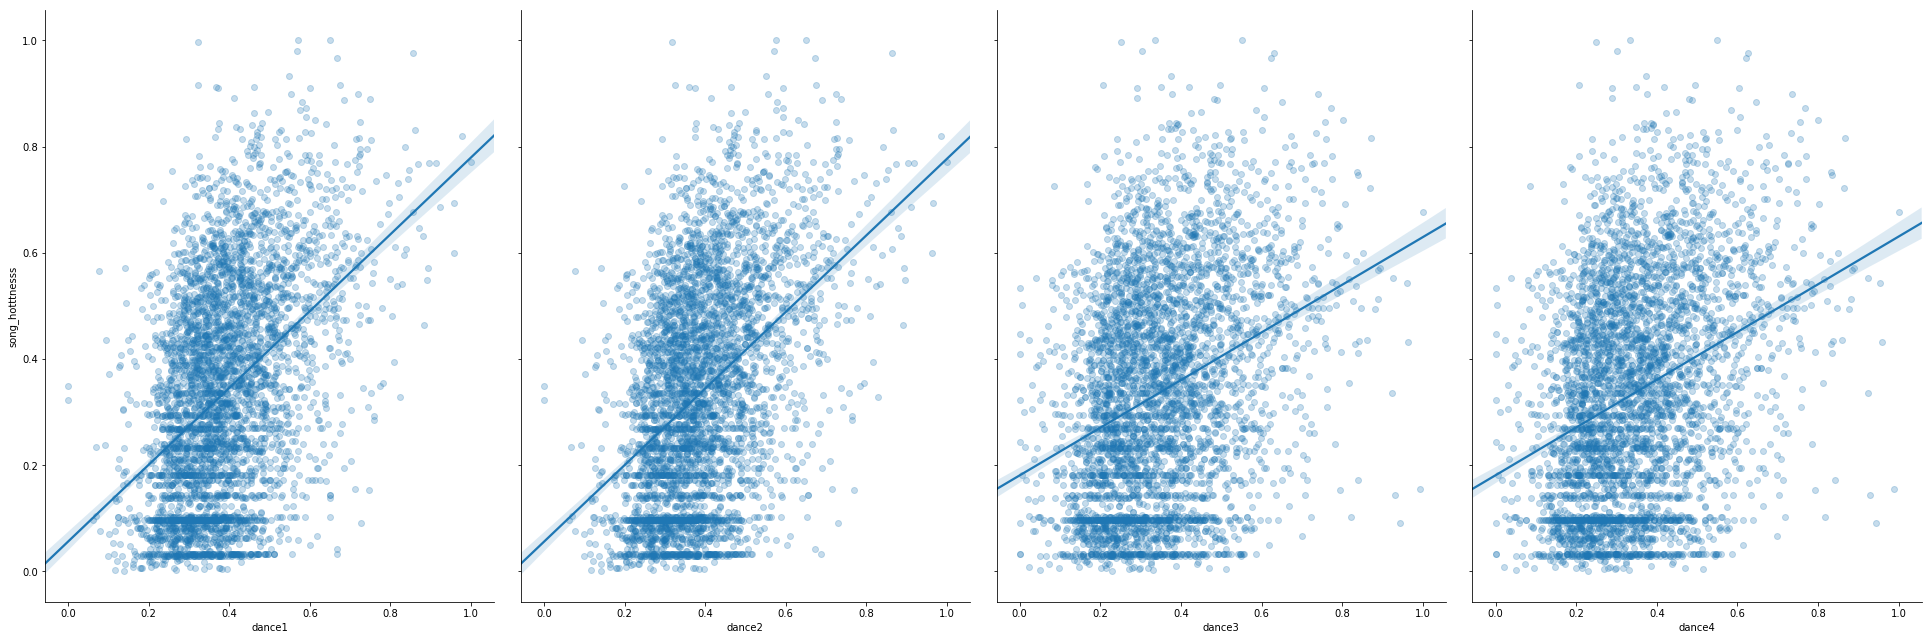

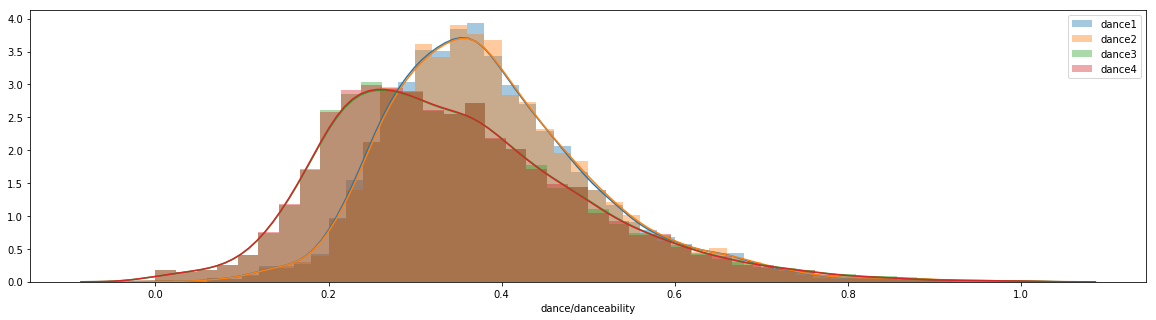

In [10]:

%run utilities.py
util = Utilities({}, use_json=False)

master_DF = util.generate_dance_measure(master_DF)

# normalize features  
master_DF = util.normalize_numeric_columns(master_DF)

sns.pairplot(master_DF, x_vars=['dance1', 'dance2', 'dance3', 'dance4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', height=9, aspect=.75,  kind='reg',plot_kws={'scatter_kws': {'alpha': 0.25}})

# Trying to figure out which energy is better to use... 
plt.subplots(figsize=(20,5))

dance = sns.distplot(master_DF['dance1'], label='dance1', )
dance = sns.distplot(master_DF['dance2'],  label='dance2')
dance = sns.distplot(master_DF['dance3'],  label='dance3')
dance = sns.distplot(master_DF['dance4'],  label='dance4', axlabel='dance/danceability')

dance.legend()